# Projet sous nutrition

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

In [1]:
%pwd

'C:\\Users\\Utilisateur\\Documents\\Projets\\Projet 1 - Panorama de la faim dans le monde'

## 1- Objectif

L'objectif est de dresser un panorama de l'alimentation et de l’état de la malnutrition dans le monde à partir de données contenues dans les fichiers :
- [ ] aide_alimentaire
- [ ] dispo_alimentaire
- [ ] population
- [ ] sous-nutrition

L’ensemble de ces fichiers provient initialement des données de la FAO téléchargeables librement ici : http://www.fao.org/faostat/fr/#data


## 2- Lexique des données

Il y a 4 fichiers CSV à disposition : 

1.	___Un fichier de disponibilité alimentaire pour l’année 2013 qui contient 17 variables___ : 
-	Le pays.
-	Le produit.
-	4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
-	10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. __Elles sont toutes exprimées en milliers de tonnes__.

2.	___Un fichier d’insécurité alimentaire, qui inclut___ :
-	Le pays.
-	Intervalle d’années.
-	Le nombre de personnes en sous-alimentation __en millions d’habitants__ (ex. : pour l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2013).

3.	___Un fichier de population qui inclut___ :
-	Le pays.
-	L’année.
-	La population du pays, exprimée __en milliers d’habitants__.

4.	___Un fichier d’aide alimentaire qui contient___ :
-	Le pays bénéficiaire.
-	L’année.
-	Le produit.
-	La quantité qui a été donnée comme aide alimentaire, __en tonnes__.




## 3- Quelques pistes 

Je vous recommande de vous concentrer sur l'année 2017. 

Voici quelques pistes à explorer/ calculer: 
- la proportion de personnes en état de sous-nutrition ;
- le nombre théorique de personnes qui pourraient être nourries. Vous devriez pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;
- idem pour la disponibilité alimentaire des produits végétaux ;
- l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

Vous pouvez faire une étude un peu plus fine pour chacun des pays. Par exemple, vous pouvez donner :
- les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017, 
- ceux qui ont le plus bénéficié d’aide depuis 2013, _
- ceux ayant le plus/le moins de disponibilité/habitant, etc.,
- et toutes autres infos que vous trouverez utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire.

Notes de mes recherches
- La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.
- __La disponibilité intérieure correspond à la disponibilité totale d’un aliment__ au sein du pays.
- Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type : A1 + A2 + … = disponibilité intérieure = B1 + B2 + …
- Mais je ne me souviens plus exactement !

Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet Bilans alimentaires, sur le lien juste ci-dessus.

Enfin, je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport à la production.



## 4 - Contraintes

Votre analyse doit inclure des analyses univariées et multivariées

## 5 - Préparation de l'environnement

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None) # afficher toutes les colonnes d'un df
pd.set_option("display.float_format", "{:.2f}".format) # pour limiter des floating

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

def pop_init():
    df = pd.read_csv("population.csv")
    return df

def dispo_init():
    df = pd.read_csv("dispo_alimentaire.csv")
    return df

def sn_init():
    df = pd.read_csv("sous_nutrition.csv")
    return df

def aa_init():
    df = pd.read_csv("aide_alimentaire.csv")
    return df
    
population = pop_init()
aide_alimentaire = aa_init()
dispo_alimentaire = dispo_init()
sous_nutrition = sn_init()


# A vous de jouer

##  Préparation, Nettoyage

### Population

Plusieurs traitements peuvent être appliquées ici, pour simplifier les calculs pour la suite :

La population étant en milliers d'habitant, faire une multiplication par 1000 prend sens, pour éviter tous problèmes pour la suite
changer le nom de la colonne Valeur

In [43]:
print(population.head(5))           #Vérification des données
print(population.info())

          Zone  Année   Valeur
0  Afghanistan   2013 32269.59
1  Afghanistan   2014 33370.79
2  Afghanistan   2015 34413.60
3  Afghanistan   2016 35383.03
4  Afghanistan   2017 36296.11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None


In [44]:
population = pop_init()                                             #initialize pour éviter les calculs répétés par erreur
population["Valeur"]                                                #Changement d'unité milliers -> millions
pop_2017 = population[population["Année"]==2017]                    #Focus en 2017
pop_2017.rename(columns={"Valeur": "Population"}, inplace=True)     #Renommer la colonne Valeur en population
pop_2017["Zone"] = pop_2017["Zone"].astype("string") 

In [5]:
pop_2017

,Zone,Année,Population
4,Afghanistan,2017,36296.11
10,Afrique du Sud,2017,57009.76
16,Albanie,2017,2884.17
22,Algérie,2017,41389.19
28,Allemagne,2017,82658.41
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.48
1396,Viet Nam,2017,94600.65
1402,Yémen,2017,27834.82
1408,Zambie,2017,16853.60


In [45]:
# population totale mondiale
pop_world_2017 = pop_2017["Population"].sum()*1000
pop_world_2017

7548134111.000001

### Sous-Nutrition

In [7]:
sous_nutrition.head(5)                               

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [8]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [9]:
sous_nutrition = sn_init()                                                         #init
sn_2017 = sous_nutrition[sous_nutrition.Année == "2016-2018"].fillna(0).copy()     #Focus 2017, remplace les NaN par 0
sn_2017.Année = sn_2017.Année.str.replace("2016-2018", "2017")
sn_2017.Valeur = sn_2017.Valeur.replace(to_replace="<0.1", value=0.1).astype(float)  #un peu de nettoyage pour pouvoir calculer
sn_2017.Valeur *= 1000
sn_2017.Année = sn_2017.Année.astype(int)
sn_2017.Zone = sn_2017.Zone.astype("string")
sn_2017.rename(columns={"Valeur":"Sous nutrition"}, inplace=True)       #renommer la colonne

In [10]:
sn_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 4 to 1216
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            203 non-null    string 
 1   Année           203 non-null    int32  
 2   Sous nutrition  203 non-null    float64
dtypes: float64(1), int32(1), string(1)
memory usage: 5.6 KB


In [48]:
# Pays avec le plus de sous nutrition
sn_2017.sort_values("Sous nutrition", ascending=False)

,Zone,Année,Sous nutrition
508,Inde,2017,190100.00
820,Pakistan,2017,24800.00
514,Indonésie,2017,23600.00
772,Nigéria,2017,22800.00
100,Bangladesh,2017,21500.00
...,...,...,...
454,Guinée équatoriale,2017,0.00
448,Guinée,2017,0.00
436,Groenland,2017,0.00
430,Grenade,2017,0.00


In [49]:
# nombre total de personnes en sous nutrition dans le monde
world_sn = sn_2017["Sous nutrition"].sum()
world_sn

537700.0

### Aide alimentaire

In [13]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [14]:
aide_alimentaire = aa_init()
aide_alimentaire["Pays bénéficiaire"] = aide_alimentaire["Pays bénéficiaire"].astype("string")
aide_alimentaire["Produit"] = aide_alimentaire["Produit"].astype("string")
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone","Valeur":"Qté"})
aide_alimentaire

,Zone,Année,Produit,Qté
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


### Disponibilité alimentaire

In [15]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [50]:
dispo_alimentaire = dispo_init()                      #Nettoyage
dispo = dispo_alimentaire.fillna(0).copy()
dispo["Zone"] = dispo["Zone"].astype("string")
dispo["Produit"] = dispo["Produit"].astype("string")
dispo["Origine"] = dispo["Origine"].astype("string")

In [77]:
dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.00,0.00,5.00,1.72,0.20,0.77,53.00,0.00,0.00,53.00,0.00,53.00,0.00,0.00,0.00
1,Afghanistan,"Agrumes, Autres",vegetale,0.00,0.00,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,0.00,0.00,0.00
2,Afghanistan,Aliments pour enfants,vegetale,0.00,0.00,1.00,0.06,0.01,0.03,2.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Ananas,vegetale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Afghanistan,Bananes,vegetale,0.00,0.00,4.00,2.70,0.02,0.05,82.00,0.00,82.00,82.00,0.00,0.00,0.00,0.00,0.00


## Analyse

### Propotion mondiale

In [51]:
sn_2017_tem = sn_2017.set_index(["Zone"])                 #Création d'un DF propre avec population et sous nutrition
pop_2017_tem = pop_2017.set_index(["Zone"])
pop_et_sous2017 = pop_2017_tem.loc[sn_2017_tem.index, :]
prop_monde2017 = pd.concat([pop_et_sous2017, sn_2017_tem], axis=1).reset_index().drop(columns="Année")
prop_monde2017

,Zone,Population,Sous nutrition
0,Afghanistan,36296.11,10500.00
1,Afrique du Sud,57009.76,3100.00
2,Albanie,2884.17,100.00
3,Algérie,41389.19,1300.00
4,Allemagne,82658.41,0.00
...,...,...,...
198,Venezuela (République bolivarienne du),29402.48,8000.00
199,Viet Nam,94600.65,6500.00
200,Yémen,27834.82,0.00
201,Zambie,16853.60,0.00


In [53]:
def prop_mondiale():                                #récupéreration des pourcentages
    a = prop_monde2017["Sous nutrition"]
    b = prop_monde2017["Population"]
    prop_monde2017["prop_pourcentage"] = (a / b) * 100  #ajoute une colonne de proportion en %

prop_mondiale()
prop_monde2017.head()

,Zone,Population,Sous nutrition,prop_pourcentage
0,Afghanistan,36296.11,10500.00,28.93
1,Afrique du Sud,57009.76,3100.00,5.44
2,Albanie,2884.17,100.00,3.47
3,Algérie,41389.19,1300.00,3.14
4,Allemagne,82658.41,0.00,0.00


In [47]:
pop_total = prop_monde2017["Population"].sum()
sous_total = prop_monde2017["Sous nutrition"].sum()
prop_monde_totale = (sous_total/pop_total)*100

print(round(prop_monde_totale,2))

7.13


### Sécurité alimentaire

In [21]:
dispo = dispo_init()

dispo_kcal_an = dispo.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().to_frame()

dispo_kcal_an = pd.merge(dispo_kcal_an, pop_2017, on="Zone")
dispo_kcal_an = dispo_kcal_an.drop(columns=["Année"])
dispo_kcal_an["Population"] *=1000
dispo_kcal_an["Besoin (Kcal/pays/an)"] = dispo_kcal_an[["Population"]]*(2500*365)

dispo_kcal_an["Disponibilité alimentaire (Kcal/personne/an)"] = dispo_kcal_an["Disponibilité alimentaire (Kcal/personne/jour)"] * 365
dispo_kcal_an.drop(columns="Disponibilité alimentaire (Kcal/personne/jour)", inplace=True)

dispo_kcal_an["Dispo(Kcal/pays/an)"] = dispo_kcal_an["Disponibilité alimentaire (Kcal/personne/an)"]*dispo_kcal_an["Population"]
dispo_kcal_an.drop(columns="Disponibilité alimentaire (Kcal/personne/an)", inplace=True)

dispo_kcal_an["Personnes pouvant être nourries (%)"] = (dispo_kcal_an["Dispo(Kcal/pays/an)"]/dispo_kcal_an["Besoin (Kcal/pays/an)"])*100

dispo_kcal_an


,Zone,Population,Besoin (Kcal/pays/an),Dispo(Kcal/pays/an),Personnes pouvant être nourries (%)
0,Afghanistan,36296113.00,33120203112500.00,27648745558315.00,83.48
1,Afrique du Sud,57009756.00,52021402350000.00,62841854038800.00,120.80
2,Albanie,2884169.00,2631804212500.00,3356076731780.00,127.52
3,Algérie,41389189.00,37767634962500.00,49747528772605.00,131.72
4,Allemagne,82658409.00,75425798212500.00,105686628455355.00,140.12
...,...,...,...,...,...
167,Émirats arabes unis,9487203.00,8657072737500.00,11340765286125.00,131.00
168,Équateur,16785361.00,15316641912500.00,14373136770690.00,93.84
169,États-Unis d'Amérique,325084756.00,296639839850000.00,436891156131080.00,147.28
170,Éthiopie,106399924.00,97089930650000.00,82681784941540.00,85.16


In [60]:
# pourcentage de couverture alimentaire mondiale (pour 2500 kcal)
secu_alimentaire_monde = (dispo_kcal_an["Dispo(Kcal/pays/an)"].sum()/dispo_kcal_an["Besoin (Kcal/pays/an)"].sum())*100
print(round(secu_alimentaire_monde,2))

114.75


In [23]:
# taux de perte mondiale
pertes_mondiale = dispo["Pertes"].sum()
dispo_mondiale = dispo["Nourriture"].sum()
taux_perte_mond = pertes_mondiale/dispo_mondiale*100
print(f"{taux_perte_mond}%")

9.304224673920043%


In [27]:
Thai_manioc = dispo[(dispo["Produit"]=="Manioc")& (dispo["Zone"]=="Thaïlande")]
Thai_manioc["Exportations - Quantité"]/Thai_manioc["Production"]*100

13809   83.41
dtype: float64

In [28]:
dispo[dispo["Produit"]=="Céréales, Autres"].sum()

Zone                                                             AfghanistanAfrique du SudAlbanieAlgérieAllemag...
Produit                                                          Céréales, AutresCéréales, AutresCéréales, Autr...
Origine                                                          vegetalevegetalevegetalevegetalevegetalevegeta...
Aliments pour animaux                                                                                     19035.00
Autres Utilisations                                                                                        1388.00
Disponibilité alimentaire (Kcal/personne/jour)                                                             1483.00
Disponibilité alimentaire en quantité (kg/personne/an)                                                      193.74
Disponibilité de matière grasse en quantité (g/personne/jour)                                                 5.46
Disponibilité de protéines en quantité (g/personne/jour)                        

In [29]:
def sort_dispo():
    x = dispo.Produit.unique()
    return np.sort(x)

sort_dispo()

array(['Abats Comestible', 'Agrumes, Autres', 'Alcool, non Comestible',
       'Aliments pour enfants', 'Ananas', 'Animaux Aquatiques Autre',
       'Arachides Decortiquees', 'Avoine', 'Bananes', 'Bananes plantains',
       'Beurre, Ghee', 'Bière', 'Blé', 'Boissons Alcooliques',
       'Boissons Fermentés', 'Café', 'Cephalopodes', 'Citrons & Limes',
       'Coco (Incl Coprah)', 'Crustacés', 'Crème', 'Céréales, Autres',
       'Dattes', 'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres',
       'Girofles', 'Graines Colza/Moutarde', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue', 'Haricots',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Coco',
       'Huile de Colza&Moutarde', 'Huile de Germe de Maïs',
       'Huile de Palme', 'Huile de Palmistes', 'Huile de Soja',
       'Huile de Son de Riz', 'Huile de Sésame', 'Huile de Tournesol',
       'Huiles de Foie de Poisso', 'Huiles de Poisson

In [32]:
# Les 10 pays recevant le plus d'aide alimentaire

aide_alimentaire = aa_init()
aa_total_since2013 = aide_alimentaire.drop(columns=["Année"]).rename(columns={"Valeur":"Qté (tonnes)"}).copy()
aa_total_since2013 = aa_total_since2013.groupby(by=["Pays bénéficiaire"]).sum()
aa_total_since2013 = aa_total_since2013.sort_values(by="Qté (tonnes)",ascending=False)

aa_total_since2013_top10 = aa_total_since2013.head(10)
aa_total_since2013_top10

,Produit,Qté (tonnes)
Pays bénéficiaire,,
République arabe syrienne,Autres non-céréalesAutres non-céréalesAutres n...,1858943
Éthiopie,Autres non-céréalesAutres non-céréalesAutres n...,1381294
Yémen,Autres non-céréalesAutres non-céréalesAutres n...,1206484
Soudan du Sud,Autres non-céréalesAutres non-céréalesAutres n...,695248
Soudan,Autres non-céréalesAutres non-céréalesBlé et F...,669784
Kenya,Autres non-céréalesAutres non-céréalesBlé et F...,552836
Bangladesh,Blé et FarinBlé et FarinBlé et FarinCéréalesCé...,348188
Somalie,Autres non-céréalesAutres non-céréalesAutres n...,292678
République démocratique du Congo,Autres non-céréalesAutres non-céréalesAutres n...,288502


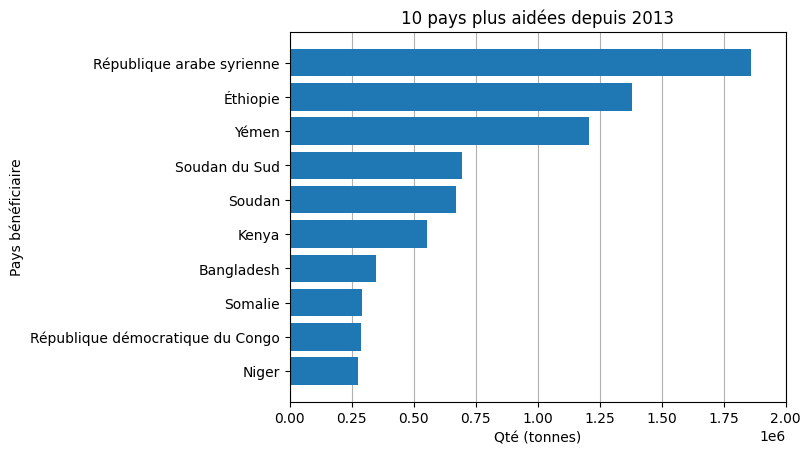

In [33]:
y = aa_total_since2013_top10.index
x = aa_total_since2013_top10["Qté (tonnes)"]

def aa_bar_graph():
    fig, ax = plt.subplots()
    ax.set_title("10 pays plus aidées depuis 2013")
    ax.set_ylabel("Pays bénéficiaire")
    ax.set_xlabel("Qté (tonnes)")
    plt.xlim(0, 2000000)
    ax.invert_yaxis()
    ax.barh(y,x)
    ax.set_axisbelow(True)
    ax.grid(axis="x")
   
    # plt.tight_layout()
    plt.show()

aa_bar_graph()

In [72]:
def taux_sn_world():
    x = (world_sn/pop_world_2017)*100
    return print(round(x,2))

taux_sn_world()

0.01


### Disponibilité alimentaire mondiale

In [75]:
# Tableau de la disponibilité alimentaire mondiale (animale + végétale)

dispo_AV = dispo[['Zone','Origine','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité intérieure',]]
dispo_AV = dispo_AV.groupby("Zone").sum().drop(columns=["Origine"])

dispo_AV = pd.merge(pop_2017,dispo_AV, on="Zone")

dispo_AV["Personnes pouvant être nourries"] = dispo_AV["Disponibilité alimentaire (Kcal/personne/jour)"] * dispo_AV["Population"] /2500
dispo_AV["Personnes pouvant être nourries (%)"] = dispo_AV["Personnes pouvant être nourries"] / dispo_AV["Population"] *100

dispo_AV

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Personnes pouvant être nourries,Personnes pouvant être nourries (%)
0,Afghanistan,2017,36296.11,2087.00,13515.00,30300.00,83.48
1,Afrique du Sud,2017,57009.76,3020.00,61256.00,68867.79,120.80
2,Albanie,2017,2884.17,3188.00,4758.00,3677.89,127.52
3,Algérie,2017,41389.19,3293.00,42630.00,54517.84,131.72
4,Allemagne,2017,82658.41,3503.00,162275.00,115820.96,140.12
...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.48,2633.00,32287.00,30966.70,105.32
168,Viet Nam,2017,94600.65,2744.00,95134.00,103833.67,109.76
169,Yémen,2017,27834.82,2217.00,9782.00,24683.92,88.68
170,Zambie,2017,16853.60,1924.00,10041.00,12970.53,76.96


In [36]:
# Analyses :

#Les 5 pays avec le moins de possibilité de nutrition
dispo_AV.sort_values("Personnes pouvant être nourries (%)", ascending= True).head(5) 

#Les 5 pays avec la plus grande possibilité de nutrition
dispo_AV.sort_values("Personnes pouvant être nourries (%)", ascending= False).head(5) 

#Les 5 pays avec la plus grande disponibilité intérieure
dispo_AV.sort_values("Disponibilité intérieure", ascending=False).head(5)  

#Les 5 pays avec la plus faible disponibilité intérieure
dispo_AV.sort_values("Disponibilité intérieure").head(5) 

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Personnes pouvant être nourries,Personnes pouvant être nourries (%)
20,Bermudes,2017,63.05,2668.00,59.00,67.29,106.72
141,Saint-Kitts-et-Nevis,2017,52.05,2491.00,65.00,51.86,99.64
6,Antigua-et-Barbuda,2017,95.43,2416.00,79.00,92.22,96.64
65,Grenade,2017,110.87,2442.00,96.00,108.30,97.68
140,Sainte-Lucie,2017,180.95,2589.00,136.00,187.40,103.56


In [37]:
# Tableau de la disponibilité alimentaire mondiale (végetale)

dispo_vegetale = dispo[['Zone','Origine','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité intérieure',]]

dispo_vegetale = dispo_vegetale[dispo["Origine"]=="vegetale"]
dispo_vegetale.groupby(by=["Zone", "Origine"]).sum()

dispo_vegetale = dispo_vegetale.groupby("Zone").sum().drop(columns=["Origine"])
dispo_vegetale = pd.merge(pop_2017,dispo_vegetale, on="Zone")

dispo_vegetale["Personnes pouvant être nourries"] = dispo_vegetale["Disponibilité alimentaire (Kcal/personne/jour)"] * dispo_vegetale["Population"] /2500
dispo_vegetale["Personnes pouvant être nourries (%)"] = dispo_vegetale["Personnes pouvant être nourries"] / dispo_vegetale["Population"] *100

dispo_vegetale

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Personnes pouvant être nourries,Personnes pouvant être nourries (%)
0,Afghanistan,2017,36296.11,1871.00,10884.00,27164.01,74.84
1,Afrique du Sud,2017,57009.76,2533.00,53439.00,57762.28,101.32
2,Albanie,2017,2884.17,2203.00,3326.00,2541.53,88.12
3,Algérie,2017,41389.19,2915.00,35510.00,48259.79,116.60
4,Allemagne,2017,82658.41,2461.00,126866.00,81368.94,98.44
...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.48,2157.00,25637.00,25368.46,86.28
168,Viet Nam,2017,94600.65,2169.00,83617.00,82075.52,86.76
169,Yémen,2017,27834.82,2028.00,8017.00,22579.61,81.12
170,Zambie,2017,16853.60,1818.00,9537.00,12255.94,72.72


In [38]:
# Analyses :

#Les 5 pays avec le moins de possibilité de nutrition végétale 
dispo_vegetale.sort_values("Personnes pouvant être nourries (%)").head(5)  

#Les 5 pays avec la plus grande possibilité de nutrition végétale
dispo_vegetale.sort_values("Personnes pouvant être nourries (%)", ascending= False).head(5)

#Les 5 pays avec la plus grande disponibilité intérieure végétale
dispo_vegetale.sort_values("Disponibilité intérieure", ascending=False).head(5) 

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Personnes pouvant être nourries,Personnes pouvant être nourries (%)
35,"Chine, continentale",2017,1421021.79,2389.00,1793572.00,1357928.42,95.56
24,Brésil,2017,207833.82,2435.00,973441.00,202430.14,97.40
74,Inde,2017,1338676.78,2219.00,947509.00,1188209.51,88.76
54,États-Unis d'Amérique,2017,325084.76,2698.00,632023.00,350831.47,107.92
56,Fédération de Russie,2017,145530.08,2517.00,209359.00,146519.69,100.68


### Parts d'utilisation de la disponibilité intérieure

In [39]:
# Tableau des parts d'utilisation (%) de la disponibilité intérieure

dispo_util = dispo[['Zone','Origine','Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité',
                          'Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock',]]

dispo_util = dispo_util.groupby("Zone").sum().drop(columns=["Origine"])

dispo_util["Part nutrition humaine"] = dispo_util["Nourriture"] / dispo_util["Disponibilité intérieure"] *100
dispo_util["Part nutrition animale"] = dispo_util["Aliments pour animaux"] / dispo_util["Disponibilité intérieure"] *100
dispo_util["Part pertes"] = dispo_util["Pertes"] / dispo_util["Disponibilité intérieure"] *100

dispo_util

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Part nutrition humaine,Part nutrition animale,Part pertes
Zone,,,,,,,,,,,,,,
Afghanistan,768.00,415.00,13515.00,278.00,2988.00,10735.00,1135.00,11171.00,395.00,63.00,-368.00,79.43,5.68,8.40
Afrique du Sud,5309.00,876.00,61256.00,11674.00,7517.00,29812.00,2193.00,63263.00,253.00,22819.00,2153.00,48.67,8.67,3.58
Albanie,660.00,174.00,4758.00,94.00,933.00,3476.00,276.00,3964.00,55.00,113.00,-45.00,73.06,13.87,5.80
Algérie,4352.00,1707.00,42630.00,655.00,17403.00,31729.00,3753.00,26359.00,449.00,637.00,-479.00,74.43,10.21,8.80
Allemagne,30209.00,7711.00,162275.00,57431.00,65353.00,79238.00,3781.00,154547.00,1551.00,39842.00,-192.00,48.83,18.62,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.00,2689.00,11850.00,4343.00,15327.00,6548.00,705.00,1192.00,3.00,804.00,-327.00,55.26,9.91,5.95
Équateur,1200.00,1909.00,18614.00,8002.00,1725.00,8574.00,707.00,24337.00,138.00,6200.00,557.00,46.06,6.45,3.80
États-Unis d'Amérique,148432.00,154699.00,777992.00,163524.00,81887.00,320889.00,7162.00,894668.00,10403.00,141010.00,-35032.00,41.25,19.08,0.92


In [82]:
# Analyses :

# Les 3 pays avec le plus de pertes alimentaire
dispo_util.sort_values("Pertes", ascending = False).head(5)

# L'utilisation de la disponibilité intérieure des 3 pays les plus sous-alimentés
dispo_util.loc[["Inde", "Pakistan", "Indonésie"]]

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Part nutrition humaine,Part nutrition animale,Part pertes
Zone,,,,,,,,,,,,,,
Inde,49129.00,15162.00,1100838.00,40807.00,18954.00,619168.00,55930.00,1126270.00,29432.00,332123.00,-3573.00,56.25,4.46,5.08
Pakistan,4755.00,3087.00,168631.00,9256.00,5561.00,90495.00,5897.00,172886.00,8443.00,56028.00,-557.00,53.66,2.82,3.50
Indonésie,9531.00,34229.00,226930.00,31912.00,23466.00,118914.00,13081.00,238559.00,1112.00,50365.00,-3182.00,52.40,4.20,5.76


In [41]:
# Tableau des parts d'utilisation (%) de la disponibilité intérieur (végétale)

dispo_util_V = dispo[['Zone','Origine','Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité',
                          'Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock',]]
dispo_util_V = dispo_util_V[dispo_util_V["Origine"]=="vegetale"].groupby("Zone").sum().drop(columns=["Origine"])

dispo_util_V["Part nutrition humaine"] = dispo_util_V["Nourriture"] / dispo_util_V["Disponibilité intérieure"] *100
dispo_util_V["Part nutrition animale"] = dispo_util_V["Aliments pour animaux"] / dispo_util_V["Disponibilité intérieure"] *100
dispo_util_V["Part pertes"] = dispo_util_V["Pertes"] / dispo_util_V["Disponibilité intérieure"] *100

dispo_util_V

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Part nutrition humaine,Part nutrition animale,Part pertes
Zone,,,,,,,,,,,,,,
Afghanistan,645.00,415.00,10884.00,278.00,2638.00,8293.00,1072.00,8891.00,393.00,63.00,-368.00,76.19,5.93,9.85
Afrique du Sud,5122.00,761.00,53439.00,10586.00,6468.00,22441.00,2110.00,55649.00,186.00,22819.00,1912.00,41.99,9.58,3.95
Albanie,559.00,172.00,3326.00,84.00,846.00,2241.00,182.00,2609.00,55.00,113.00,-45.00,67.38,16.81,5.47
Algérie,4352.00,1706.00,35510.00,649.00,14672.00,24797.00,3587.00,21964.00,428.00,637.00,-479.00,69.83,12.26,10.10
Allemagne,28122.00,6842.00,126866.00,34454.00,50642.00,47079.00,3717.00,110926.00,1475.00,39686.00,-247.00,37.11,22.17,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.00,2619.00,9623.00,3326.00,12546.00,4426.00,675.00,780.00,0.00,804.00,-376.00,45.99,12.20,7.01
Équateur,1001.00,1905.00,14926.00,7142.00,1475.00,5149.00,654.00,20042.00,125.00,6200.00,555.00,34.50,6.71,4.38
États-Unis d'Amérique,145289.00,145102.00,632023.00,140442.00,69522.00,189122.00,6937.00,740194.00,9030.00,140986.00,-37242.00,29.92,22.99,1.10


In [42]:
# Tableau des parts d'utilisation (%) de la disponibilité intérieur (animale)

dispo_util_A = dispo[['Zone','Origine','Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité',
                          'Importations - Quantité','Nourriture','Pertes','Production','Semences','Traitement','Variation de stock',]]
dispo_util_A = dispo_util_A[dispo_util_A["Origine"]=="animale"].groupby("Zone").sum().drop(columns=["Origine"])

dispo_util_A["Part nutrition humaine"] = dispo_util_A["Nourriture"] / dispo_util_A["Disponibilité intérieure"] *100
dispo_util_A["Part nutrition animale"] = dispo_util_A["Aliments pour animaux"] / dispo_util_A["Disponibilité intérieure"] *100
dispo_util_A["Part pertes"] = dispo_util_A["Pertes"] / dispo_util_A["Disponibilité intérieure"] *100

dispo_util_A

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Part nutrition humaine,Part nutrition animale,Part pertes
Zone,,,,,,,,,,,,,,
Afghanistan,123.00,0.00,2631.00,0.00,350.00,2442.00,63.00,2280.00,2.00,0.00,0.00,92.82,4.68,2.39
Afrique du Sud,187.00,115.00,7817.00,1088.00,1049.00,7371.00,83.00,7614.00,67.00,0.00,241.00,94.29,2.39,1.06
Albanie,101.00,2.00,1432.00,10.00,87.00,1235.00,94.00,1355.00,0.00,0.00,0.00,86.24,7.05,6.56
Algérie,0.00,1.00,7120.00,6.00,2731.00,6932.00,166.00,4395.00,21.00,0.00,0.00,97.36,0.00,2.33
Allemagne,2087.00,869.00,35409.00,22977.00,14711.00,32159.00,64.00,43621.00,76.00,156.00,55.00,90.82,5.89,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.00,70.00,2227.00,1017.00,2781.00,2122.00,30.00,412.00,3.00,0.00,49.00,95.29,0.00,1.35
Équateur,199.00,4.00,3688.00,860.00,250.00,3425.00,53.00,4295.00,13.00,0.00,2.00,92.87,5.40,1.44
États-Unis d'Amérique,3143.00,9597.00,145969.00,23082.00,12365.00,131767.00,225.00,154474.00,1373.00,24.00,2210.00,90.27,2.15,0.15
